# Selecting Features for Classification

In this notebook we will look at how using different feature subsets from a dataset can impact on classification performance.

In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 13})

For this example, we will use the [*Diabetes* dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set), originally collected by the US National Institute of Diabetes. Given a set of patient diagnostic measurements, the objective of this task is to predict whether or not the patient has diabetes. The features in the data are as follows:

- *preg*: Number of times the patient has been pregnant
- *plasma*: Plasma glucose concentration
- *pres*: Diastolic blood pressure
- *skin*: Triceps skin fold thickness
- *insulin*: 2-Hour serum insulin level
- *bmi*: Body mass index 
- *family*: Score likelihood of diabetes based on family history
- *age*: The patient's age in years
- *outcome*: The actual diagnosis for the patient ('positive' or 'negative')

## Data Loading and Initial Classification

Load the complete dataset from a CSV file:

In [6]:
df = pd.read_csv('diabetes.csv')
df.head()

,preg,plasma,pres,skin,insulin,bmi,family,age,outcome
0,6,148,72,35,0,33.6,0.627,50,positive
1,1,85,66,29,0,26.6,0.351,31,negative
2,8,183,64,0,0,23.3,0.672,32,positive
3,1,89,66,23,94,28.1,0.167,21,negative
4,0,137,40,35,168,43.1,2.288,33,positive


Separate out the features to use for classification from the target label itself:

In [8]:
target = df["outcome"].values
features = list(df.columns)
features.remove("outcome")
print("Features: %s" % features)

Features: ['preg', 'plasma', 'pres', 'skin', 'insulin', 'bmi', 'family', 'age']


Firstly, try binary classification with the full feature set:

In [10]:
data = df[features]
data.head()

,preg,plasma,pres,skin,insulin,bmi,family,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [11]:
target

array(['positive', 'negative', 'positive', 'negative', 'positive',
       'negative', 'positive', 'negative', 'positive', 'positive',
       'negative', 'positive', 'negative', 'positive', 'positive',
       'positive', 'positive', 'positive', 'negative', 'positive',
       'negative', 'negative', 'positive', 'positive', 'positive',
       'positive', 'positive', 'negative', 'negative', 'negative',
       'negative', 'positive', 'negative', 'negative', 'negative',
       'negative', 'negative', 'positive', 'positive', 'positive',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'positive', 'negative', 'negative', 'positive', 'negative',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'negative', 'positive', 'negative', 'negative', 'negative',
       'negative', 'positive', 'negative', 'negative', 'positive',
       'negative', 'positive', 'negative', 'negative', 'negative',
       'positive', 'negative', 'positive', 'negative', 'negati

We will use 5-fold cross validation to evaluate a KNN classifier:

In [13]:
knn = KNeighborsClassifier(n_neighbors=3)
acc_scores = cross_val_score(knn, data, target, cv=2, scoring="accuracy")
mean_accuracy = np.mean(acc_scores)
print("Mean cross validation accuracy = %.3f" % mean_accuracy)

Mean cross validation accuracy = 0.716


We could decide to manually choose a subset of features that we might believe are particularly relevant for the problem. For instance:

- *insulin*: 2-Hour serum insulin level
- *bmi*: Body mass index 
- *family*: Score likelihood of diabetes based on family history
- *age*: The patient's age in years

In [15]:
subset1 = ["insulin", "bmi", "family", "age"]
data_subset1 = data[subset1]
data_subset1.head()

,insulin,bmi,family,age
0,0,33.6,0.627,50
1,0,26.6,0.351,31
2,0,23.3,0.672,32
3,94,28.1,0.167,21
4,168,43.1,2.288,33


We will apply the same classifier and evaluation process on the subset of features:

In [17]:
knn = KNeighborsClassifier(n_neighbors=3)
acc_scores = cross_val_score(knn, data_subset1, target, cv=2, scoring="accuracy")
mean_accuracy = np.mean(acc_scores)
print("Mean cross validation accuracy = %.3f" % mean_accuracy)

Mean cross validation accuracy = 0.671


If this does not work, we might manually choose an alternative subset of features:

In [19]:
subset2 = ["preg", "plasma", "bmi", "family", "age"]
data_subset2 = data[subset2]
data_subset2.head()

,preg,plasma,bmi,family,age
0,6,148,33.6,0.627,50
1,1,85,26.6,0.351,31
2,8,183,23.3,0.672,32
3,1,89,28.1,0.167,21
4,0,137,43.1,2.288,33


In [20]:
knn = KNeighborsClassifier(n_neighbors=3)
acc_scores = cross_val_score(knn, data_subset2, target, cv=2, scoring="accuracy")
mean_accuracy = np.mean(acc_scores)
print("Mean cross validation accuracy = %.3f" % mean_accuracy)

Mean cross validation accuracy = 0.696


## Feature Selection

Rather than manually selecting features, we could automate this process to search for a set of features that leads to the maximum classification accuracy.

For more information see:

https://scikit-learn.org/stable/modules/feature_selection.html

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html

One way to conduct the search process is *forward selection*. Here we start with an empty set of features. At each step, the best of the original features is determined and added to the current set. The actual determination of the best feature at each step is based on the cross-validation score achieved using that feature when combined with a specified classifier.

In [23]:
# the classifier to use during the search
knn = KNeighborsClassifier(n_neighbors=3)
# perform the search up to the specified number of features
sfs_forward = SequentialFeatureSelector(
    knn, n_features_to_select=3, direction="forward"
).fit(data, target)
# get the boolean mask of selected features
feature_mask = sfs_forward.get_support()
data_forward = data.iloc[:, feature_mask]
# get the names of the selected featured
features_forward = list(data_forward.columns)
print("Selected features:", features_forward)

Selected features: ['plasma', 'bmi', 'family']


We can use these features then for a subsequent classification process:

In [25]:
acc_scores = cross_val_score(knn, data_forward, target, cv=2, scoring="accuracy")
mean_accuracy = np.mean(acc_scores)
print("Mean cross validation accuracy = %.3f" % mean_accuracy)

Mean cross validation accuracy = 0.721


Another approach for searching for a good feature subset is *backward selection* (also called *backward elimination*). This strategy begins with the full set of features. At each step, it removes the worst feature remaining in the current set. 

In [27]:
# the classifier to use during the search
knn = KNeighborsClassifier(n_neighbors=3)
# perform the search down to the specified number of features
sfs_backward = SequentialFeatureSelector(
    knn, n_features_to_select=3, direction="backward"
).fit(data, target)

# get the boolean mask of selected features
feature_mask = sfs_backward.get_support()
data_backward = data.iloc[:, feature_mask]
# get the names of the selected featured
features_backward = list(data_backward.columns)
print("Selected features:", features_backward)

Selected features: ['preg', 'plasma', 'age']


Again we can use these features then for a subsequent classification process:

In [29]:
acc_scores = cross_val_score(knn, data_backward, target, cv=2, scoring="accuracy")
mean_accuracy = np.mean(acc_scores)
print("Mean cross validation accuracy = %.3f" % mean_accuracy)

Mean cross validation accuracy = 0.720


Note that both of the search procedures are "greedy" (i.e. they make locally optimal choice at each stage). This speeds up the feature selection process, but means that we are not guarateed to find the globally optimal result. Also, this means that *forward selection* and *backward selection* can generated different feature subsets for the same data.

## Feature Importance

Rather than selecting subsets of features, an alternative approach is produce some kind of ranking of the features, from "best" to "worst".

One ranking approach is to calculate the *permutation importance* of a feature is calculated as follows. First, a baseline score is calculated on the original dataset. Next, a feature is "permuted" (e.g. the values are randomly shuffled) and the score is calculated again. The permutation importance is defined to be the difference between the baseline score and the score after permutating the feature. This process is repeated multiple times for each feature, so that we can calculate mean importances scores for every feature. Better feature should have higher importance scores.


For more information see:

https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html

In [32]:
from sklearn.inspection import permutation_importance

In [33]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(data, target)
result = permutation_importance(knn, data, target, n_repeats=10, random_state=0)

We could the display the mean permutation importance scores for each feature in the data:

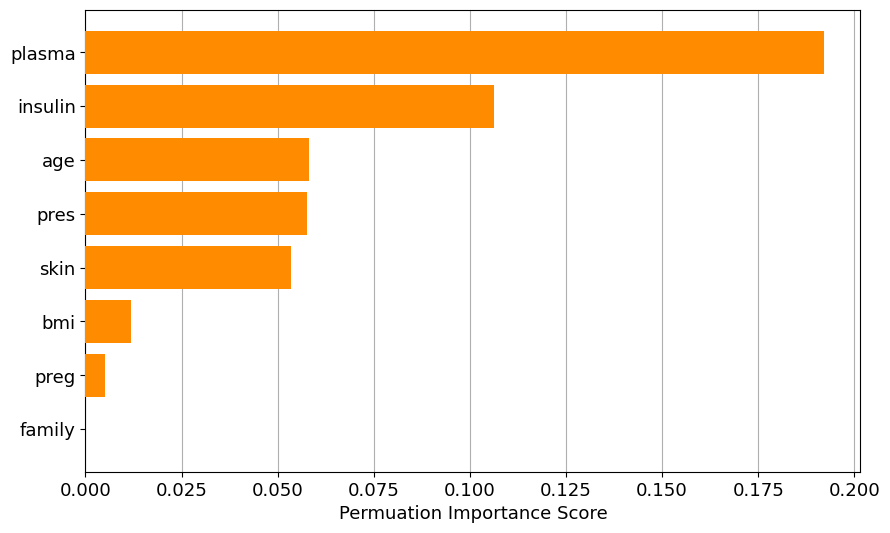

In [35]:
sorted_idx = result.importances_mean.argsort()
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(data.columns[sorted_idx], result.importances[sorted_idx].mean(axis=1).T, color="darkorange", zorder=3)
ax.xaxis.grid(True)
ax.set_xlabel("Permuation Importance Score");

We could decide to use some of the top-ranked features from above in a subsequent classification process:

In [37]:
# note we need to reverse the order
ranked_features = list(data.columns[sorted_idx])
ranked_features.reverse()
# we could pick the top 4 in this case
subset_top4 = ranked_features[0:4]
subset_top4

['plasma', 'insulin', 'age', 'pres']

In [38]:
data_top4 = data[subset_top4]
knn = KNeighborsClassifier(n_neighbors=3)
acc_scores = cross_val_score(knn, data_top4, target, cv=2, scoring="accuracy")
mean_accuracy = np.mean(acc_scores)
print("Mean cross validation accuracy = %.3f" % mean_accuracy)

Mean cross validation accuracy = 0.728
